# Explaining Models with Shap

Nena Esaw

In [22]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Your Saved Joblib File

* In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."

* Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

In [2]:
import joblib
loaded = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [116]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
rf_reg = loaded['RandomForest']
lin_reg = loaded['LinearRegression']



## Global Explanations

### Explain your tree-based model with shap

* Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

* Create a model explainer,

* Calculate the shap values for your model.

* Create a summary plot - with plot_type='bar':

    * In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
    
        * Are they the same features in both? If not, what's different?
        
* Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

* Create a second summary plot - with plot_type='dot'
    * In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    
    * Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

In [4]:
# Import shap and initialize javascript:
import shap
shap.initjs()


#### Create X_shap and y_shap variable from training data 

In [5]:
X_shap = shap.sample(X_train_df, random_state=321)
X_shap.head()


Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
3888                       0.0                       1.0   
2497                       0.0                       1.0   
7723                       1.0                       0.0   
8117                       1.0                       0.0   
7475                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
3888                     0.0               0.0                  0.0   
2497                     0.0               0.0                  0.0   
7723                     0.0               0.0                  0.0   
8117                     0.0               0.0                  0.0   
7475                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
3888               0.0              0.0                     1.0   
2497               0.0              0.0                     0.0   
7723               0.0              0.0                     0.0   
8117               0.0              0.0                     0.0   
7475               0.0              0.0                     0.0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  ...  \
3888                              0.0                    0.0  ...   
2497                              1.0                    0.0  ...   
7723                              1.0                    0.0  ...   
8117                              1.0                    0.0  ...   
7475                              0.0                    0.0  ...   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
3888                          0.0                          1.0   
2497                          1.0                          0.0   
7723                          0.0                          1.0   
8117                          0.0                          1.0   
7475                          0.0                          1.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
3888                          0.0                        0.0   
2497                          0.0                        0.0   
7723                          0.0                        0.0   
8117                          0.0                        0.0   
7475                          0.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
3888                            1.0                            0.0   
2497                            1.0                            0.0   
7723                            1.0                            0.0   
8117                            1.0                            0.0   
7475                            1.0                            0.0   

      Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  
3888                            0.0     0.698654         0.873252 -1.677139  
2497                            0.0     0.520761         0.418566  1.275305  
7723                            0.0     1.090017        -0.986085  0.684178  
8117                            0.0    -0.499157        -0.316610  1.616527  
7475                            0.0     0.497042        -0.410893 -0.023898  

[5 rows x 31 columns]

In [6]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 


3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
4300    1765.0358
2422    2099.9332
262     1225.0720
7731    1076.5986
7978    3350.3056
Name: Item_Outlet_Sales, Length: 100, dtype: float64

### Model Explainer

#### Calculate the shap values for your model

In [122]:
#create a shape explainer using random forest tree model 
rf_explainer = shap.Explainer(rf_reg)
rf_explainer

#get shap values from the explainer 
rf_shap_values = rf_explainer(X_shap)

In [123]:
rf_shap_values.shape

(100, 31)

In [126]:
#create a shape explainer using linear regression model 
lin_reg_explainer = shap.Explainer(lin_reg, X_shap)
lin_reg_explainer

#get shap values from the explainer 
lin_reg_shap_values = lin_reg_explainer(X_shap)

In [127]:
lin_reg_shap_values.shape

(100, 31)

#### Create a summary plot - with plot_type='bar'

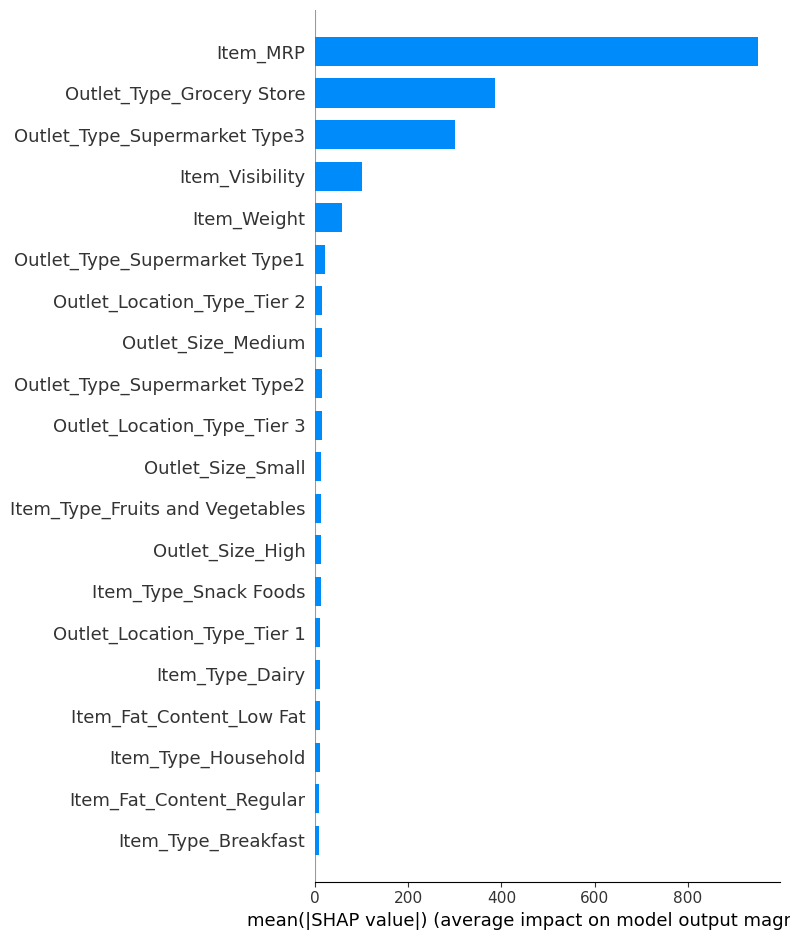

In [18]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')


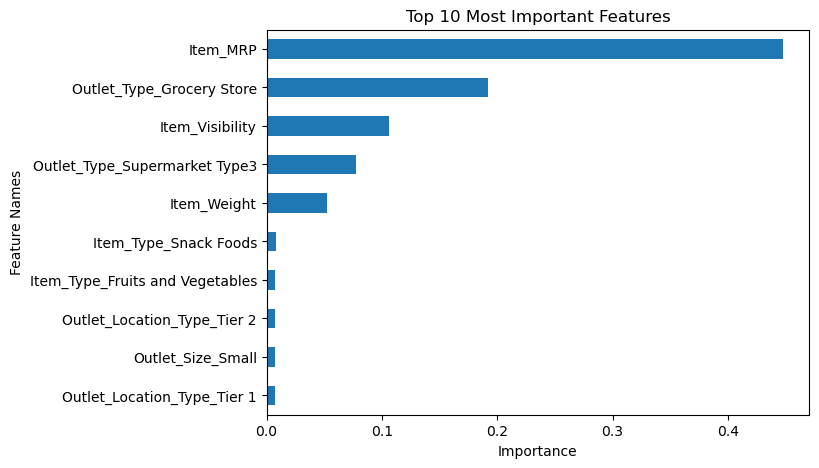

Are they the same features in both? If not, what's different?

* The shap summary is showing the same 5 but the order for Item Visibility and Supermarket Type 3 are in ranking differently. The Tree model has Supermarket Type 3 in 4 and Item Visibility in 3, while the SHAP summary has Supermarket Type 3 in 3 and Item visibility in 4. 

#### Create a second summary plot - with plot_type='dot'

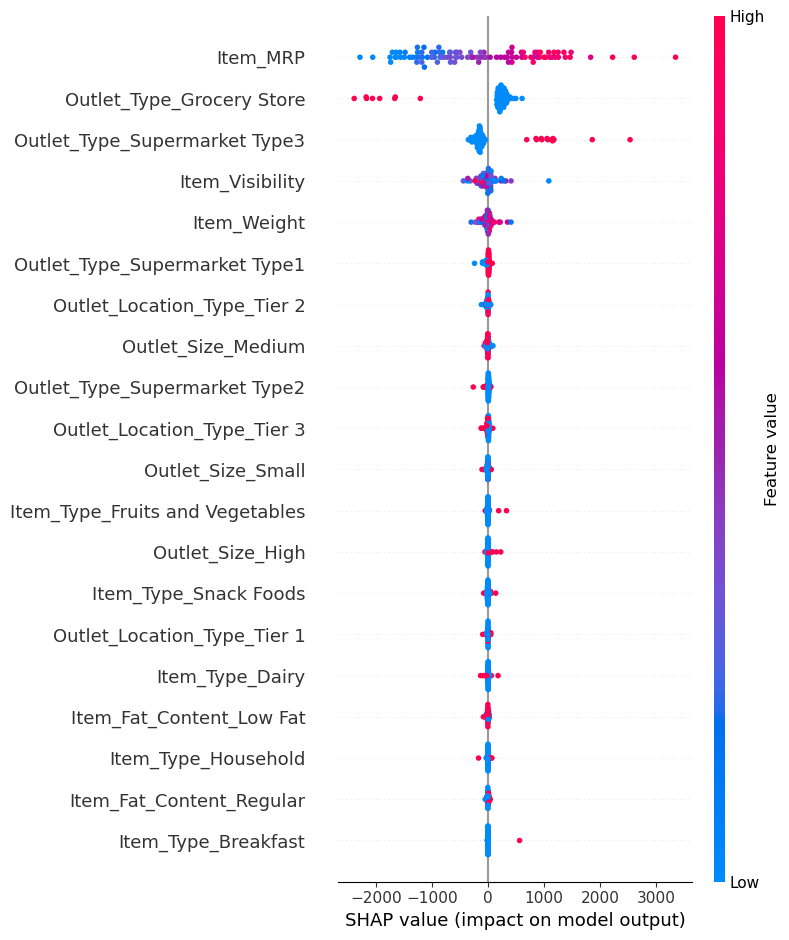

In [17]:
shap.summary_plot(shap_values,X_shap);

Interpret the top 3 most important features and how they influence your model's predictions

* Item MRP is increasing as the SHAP value increases. This seems to have a positive effect on our model. 

* Outlet Type Grocery Store is a one hot-encoded, the blue is positively effecting the model and the red is negatively decreasing the models predictions. The blue seems to be more impactful in the model predictions of revnue. 

* Supermarket Type 3 is one hot encoded and the blue is negatively impacting the models predictions and the red is postively impacting the predicions. 

* Will use local explanations to explore the grocery store and supermarket type 3 stores to determine why our models selected these as heavy predictors for our models. 




## Local Explanations

Continue working in your model explanation notebook from the previous core assignment. Add a new "Local Explanations" header at the bottom and continue your work:

* Select at least 2 example rows based on the insights gained from your previous core assignments this week.

* Explain why you selected the examples that you did.
    
    * If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).
    
* For each example, produce :

   * A Lime tabular explanation
   
        * Interpret what features most heavily influenced the predictions, according to LIME.
        
        * Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the lime explanation.
        
* An individual Force Plot

    * Interpret what features most heavily influenced the predictions, according to SHAP.
    
    * Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the individual force plot.

### Using LIME tabular with Models

In [19]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer


In [101]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap.head()



Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
0                       0.0                       1.0                     0.0   
1                       1.0                       0.0                     0.0   
2                       1.0                       0.0                     0.0   
3                       0.0                       1.0                     0.0   
4                       1.0                       0.0                     0.0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0               0.0                  0.0               0.0              0.0   
1               0.0                  0.0               0.0              0.0   
2               0.0                  0.0               0.0              0.0   
3               0.0                  0.0               0.0              0.0   
4               0.0                  0.0               0.0              0.0   

   Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
0                     1.0                              0.0   
1                     0.0                              0.0   
2                     0.0                              1.0   
3                     0.0                              0.0   
4                     0.0                              1.0   

   Item_Type_Hard Drinks  ...  Outlet_Location_Type_Tier 1  \
0                    0.0  ...                          0.0   
1                    0.0  ...                          0.0   
2                    0.0  ...                          0.0   
3                    0.0  ...                          0.0   
4                    0.0  ...                          0.0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                          1.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          1.0   
3                          0.0                          1.0   
4                          1.0                          0.0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                        0.0                            1.0   
1                        0.0                            1.0   
2                        0.0                            1.0   
3                        0.0                            1.0   
4                        0.0                            1.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  Item_Weight  \
0                            0.0                            0.0    -0.858500   
1                            0.0                            0.0    -1.336438   
2                            0.0                            0.0    -1.139570   
3                            0.0                            0.0    -0.617752   
4                            0.0                            0.0    -0.428000   

   Item_Visibility  Item_MRP  
0        -0.321711  1.667625  
1         0.102003 -0.453954  
2         1.211161  1.109948  
3        -1.073611 -0.896239  
4         0.885863  0.795285  

[5 rows x 31 columns]

#### Looking at Outlet Type Grocery Store 

In [149]:
# what is the max/range of Outlet Type Grocery Store 
X_shap['Outlet_Type_Grocery Store'].describe()



count    100.00000
mean       0.08000
std        0.27266
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: Outlet_Type_Grocery Store, dtype: float64

In [103]:
## saving the index of the most Outlet Type Grocery Stores 
grocery_store = X_shap['Outlet_Type_Grocery Store'].idxmax()
grocery_store

5

In [105]:
# checking the feature values for selected example
X_shap.iloc[grocery_store]

Item_Fat_Content_Low Fat           1.000000e+00
Item_Fat_Content_Regular           0.000000e+00
Item_Type_Baking Goods             0.000000e+00
Item_Type_Breads                   0.000000e+00
Item_Type_Breakfast                0.000000e+00
Item_Type_Canned                   0.000000e+00
Item_Type_Dairy                    0.000000e+00
Item_Type_Frozen Foods             0.000000e+00
Item_Type_Fruits and Vegetables    0.000000e+00
Item_Type_Hard Drinks              0.000000e+00
Item_Type_Health and Hygiene       0.000000e+00
Item_Type_Household                1.000000e+00
Item_Type_Meat                     0.000000e+00
Item_Type_Others                   0.000000e+00
Item_Type_Seafood                  0.000000e+00
Item_Type_Snack Foods              0.000000e+00
Item_Type_Soft Drinks              0.000000e+00
Item_Type_Starchy Foods            0.000000e+00
Outlet_Size_High                   0.000000e+00
Outlet_Size_Medium                 0.000000e+00
Outlet_Size_Small                  1.000

In [106]:
## what is the revnue for these stores 
y_shap.iloc[grocery_store]

761.0094

In [121]:
exp = lime_explainer.explain_instance(X_shap.iloc[grocery_store],
                               lin_reg.predict)
exp.show_in_notebook()



X does not have valid feature names, but LinearRegression was fitted with feature names


In [143]:
exp = lime_explainer.explain_instance(X_shap.iloc[grocery_store],
                               rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


* The linear regression had better predictions than the random forest model. They both had Item MRP as one of the top impactful feature. 

#### Looking at Outlet_Type_Supermarket Type3

In [108]:
# what is the max/range of Outlet Type Supermarket Type 3 
X_shap['Outlet_Type_Supermarket Type3'].describe()


count    100.000000
mean       0.130000
std        0.337998
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Outlet_Type_Supermarket Type3, dtype: float64

In [109]:
## saving the index of the most Outlet Type Grocery Stores 
supermarket = X_shap['Outlet_Type_Supermarket Type3'].idxmax()
supermarket

8

In [110]:
# checking the feature values for selected example
X_shap.iloc[supermarket]

Item_Fat_Content_Low Fat           1.000000e+00
Item_Fat_Content_Regular           0.000000e+00
Item_Type_Baking Goods             0.000000e+00
Item_Type_Breads                   0.000000e+00
Item_Type_Breakfast                0.000000e+00
Item_Type_Canned                   0.000000e+00
Item_Type_Dairy                    0.000000e+00
Item_Type_Frozen Foods             0.000000e+00
Item_Type_Fruits and Vegetables    0.000000e+00
Item_Type_Hard Drinks              0.000000e+00
Item_Type_Health and Hygiene       1.000000e+00
Item_Type_Household                0.000000e+00
Item_Type_Meat                     0.000000e+00
Item_Type_Others                   0.000000e+00
Item_Type_Seafood                  0.000000e+00
Item_Type_Snack Foods              0.000000e+00
Item_Type_Soft Drinks              0.000000e+00
Item_Type_Starchy Foods            0.000000e+00
Outlet_Size_High                   0.000000e+00
Outlet_Size_Medium                 1.000000e+00
Outlet_Size_Small                  0.000

In [111]:
## what was the revnue for these type of stores
y_shap.iloc[supermarket]

2045.3376

In [141]:
exp = lime_explainer.explain_instance(X_shap.iloc[supermarket],
                               lin_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but LinearRegression was fitted with feature names


In [142]:
exp = lime_explainer.explain_instance(X_shap.iloc[supermarket],
                               rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


* The linear regression model had better predictions than the random forest model. They both have grocery store and supermarket types are positive features.  

### Individual Force Plot

#### Random Forest Models

In [139]:
shap.force_plot(rf_explainer.expected_value,
               shap_values=rf_shap_values[grocery_store].values,
               features = X_shap.iloc[grocery_store])

* Item mrp has a positive impact on our model. 

In [140]:
shap.force_plot(rf_explainer.expected_value,
               shap_values=rf_shap_values[supermarket].values,
               features = X_shap.iloc[supermarket])

* The supermarket type3 has a positive impact while the item mrp is negatively impacts the model. 

#### Linear Regression Models

In [148]:
shap.force_plot(lin_reg_explainer.expected_value,
               shap_values=lin_reg_shap_values[grocery_store].values,
               features = X_shap.iloc[grocery_store])

* Item mrp heavily impacts this model while grocery store type is a negative impact 

In [147]:
shap.force_plot(lin_reg_explainer.expected_value,
               shap_values=lin_reg_shap_values[supermarket].values,
               features = X_shap.iloc[supermarket])

* Supermarket type 3 is a positive impact and item mrp is negative on this model. 